# Euler's method

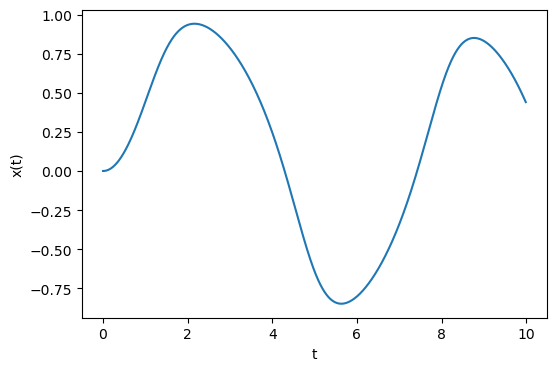

In [4]:
from math import sin
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (6,4)

def f(x,t):
    return -x**3 + sin(t)

a = 0.0           # Start of the interval
b = 10.0          # End of the interval
N = 1000          # Number of steps
h = (b-a)/N       # Size of a single step
x = 0.0           # Initial condition

tpoints = np.arange(a,b,h)
xpoints = np.zeros(N)
xpoints[0] = x
for i in range(1,N):
    xpoints[i] = xpoints[i-1] + h*f(xpoints[i-1], tpoints[i-1])

plt.plot(tpoints,xpoints)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

# RK2 Method

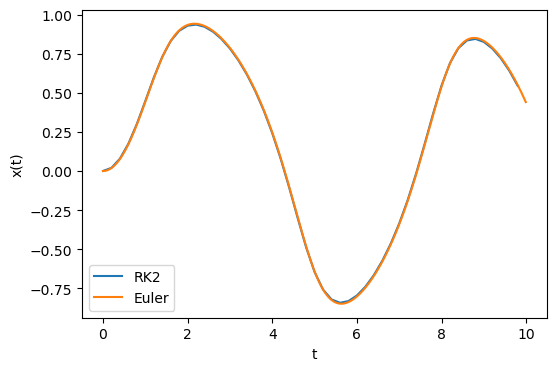

In [5]:
from math import sin
import numpy as np
import matplotlib.pyplot as plt

def f(x,t):
    return -x**3 + sin(t)

a = 0.0           # Start of the interval
b = 10.0          # End of the interval
N = 50          # Number of steps
h = (b-a)/N       # Size of a single step
x = 0.0           # Initial condition

tpoints2 = np.arange(a,b,h)
xpoints2 = np.zeros(N)
xpoints2[0] = x
for i in range(1,N):
    k1 = h * f(xpoints2[i-1], tpoints2[i-1])
    k2 = h * f(xpoints2[i-1] + 0.5*k1, tpoints2[i-1] + 0.5*h)
    xpoints2[i] = xpoints2[i-1] + k2

plt.plot(tpoints2,xpoints2, label='RK2')
plt.plot(tpoints,xpoints, label='Euler')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend(loc='best')
plt.show()

# RK4 method

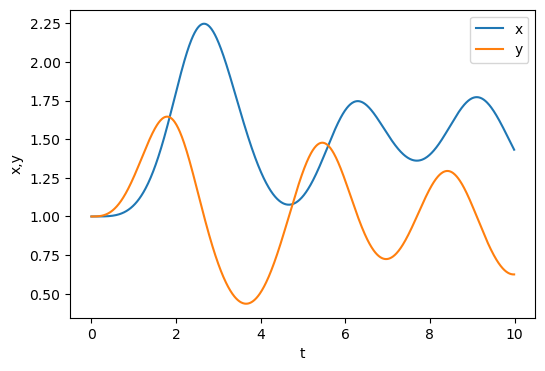

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(r,t):
    x = r[0]
    y = r[1]
    fx = x*y - x
    fy = y - x*y + np.sin(t)**2
    return np.array([fx,fy],float)

a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

tpoints = np.arange(a,b,h)
r = np.zeros((N,2))
r[0] = [1.0, 1.0]

# To be completed in class: loop over time to solve for x and y, which
# will be stored in r[]
for i in range(1,N):
    t = tpoints[i-1]
    k1 = h * f(r[i-1], t)
    k2 = h * f(r[i-1] + 0.5*k1, t+0.5*h)
    k3 = h * f(r[i-1] + 0.5*k2, t+0.5*h)
    k4 = h * f(r[i-1]+k3, t+h)
    r[i] = r[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6


plt.plot(tpoints, r[:,0], label='x')
plt.plot(tpoints, r[:,1], label='y')
plt.xlabel("t")
plt.ylabel("x,y")
plt.legend(loc='best')
plt.show()


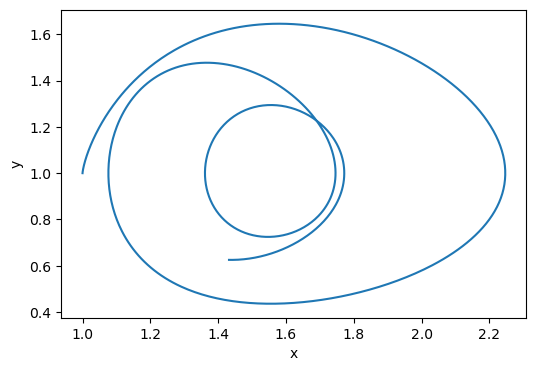

In [7]:
plt.plot(r[:,0], r[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.show()


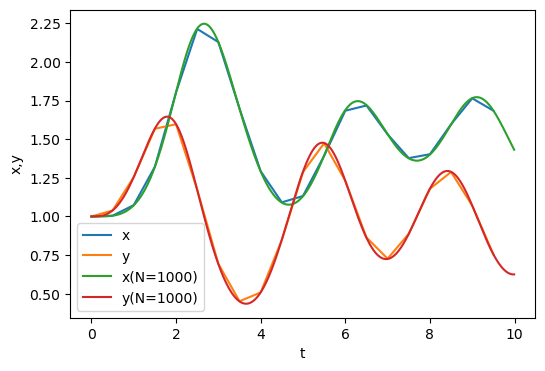

In [8]:
def f(r,t):
    x = r[0]
    y = r[1]
    fx = x*y - x
    fy = y - x*y + np.sin(t)**2
    return np.array([fx,fy],float)

a = 0.0
b = 10.0
N = 20
h = (b-a)/N

tpoints0 = np.arange(a,b,h)
r0 = np.zeros((N,2))
r0[0] = [1.0, 1.0]

# To be completed in class: loop over time to solve for x and y, which
# will be stored in r[]
for i in range(1,N):
    t = tpoints0[i-1]
    k1 = h * f(r0[i-1], t)
    k2 = h * f(r0[i-1] + 0.5*k1, t+0.5*h)
    k3 = h * f(r0[i-1] + 0.5*k2, t+0.5*h)
    k4 = h * f(r0[i-1]+k3, t+h)
    r0[i] = r0[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6


plt.plot(tpoints0, r0[:,0], label='x')
plt.plot(tpoints0, r0[:,1], label='y')
plt.plot(tpoints, r[:,0], label='x(N=1000)')
plt.plot(tpoints, r[:,1], label='y(N=1000)')
plt.xlabel("t")
plt.ylabel("x,y")
plt.legend(loc='best')
plt.show()


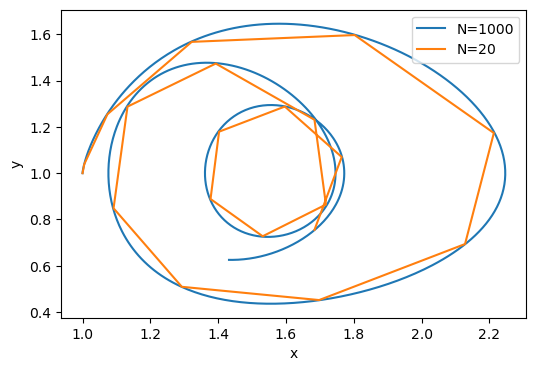

In [9]:
plt.plot(r[:,0], r[:,1], label="N=1000")
plt.plot(r0[:,0], r0[:,1], label="N=20")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


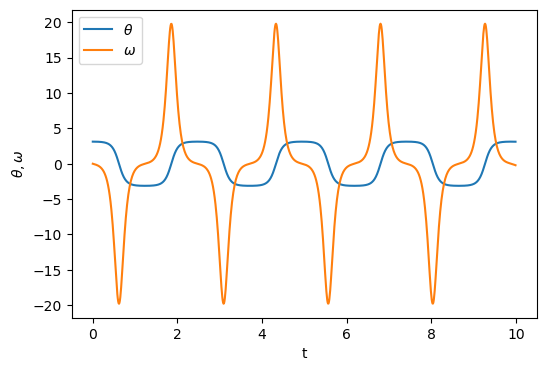

In [11]:
g = 9.81  # gravity
l = 0.1   # arm length of pendulum [m]
theta0 = 179.0 # initial arm position [degrees]

def f(r,t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l) * np.sin(theta)
    return np.array([ftheta,fomega],float)

a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

tpoints = np.arange(a,b,h)
r = np.zeros((N,2))
r[0] = [np.pi * theta0/180.0, 0.0]

# Loop over time to solve for x and y, which will be stored in r[]
for i,t in enumerate(tpoints[1:],1):
    k1 = h * f(r[i-1], t)
    k2 = h * f(r[i-1]+0.5*k1, t+0.5*h)
    k3 = h * f(r[i-1]+0.5*k2, t+0.5*h)
    k4 = h * f(r[i-1]+k3, t+h)
    r[i] = r[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6.0

plt.plot(tpoints, r[:,0], label=r'$\theta$')
plt.plot(tpoints, r[:,1], label=r'$\omega$')
plt.xlabel("t")
plt.ylabel(r"$\theta, \omega$")
plt.legend()
plt.show()